Dataset Link: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# Read the CSV file

In [ ]:
df = pd.read_csv('./survey-lung-cancer.csv')

# Take a look at the dataset

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# EDA

Let's see how many features and rows we have in the dataset.

In [ ]:
df.shape

(309, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

See how many people in the dataset have Lung Cancer and how many don't.

In [ ]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

As we can see, `270` people in the dataset suffer from lung cancer and `39` people don't have such disease.

We should check if there is any `null` values in the data frame.

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

As we can see there is no `null` value in our data frame.

# Data Visualization
Let's explore the Dataset and see what's going on inisde it.

## Age distribution

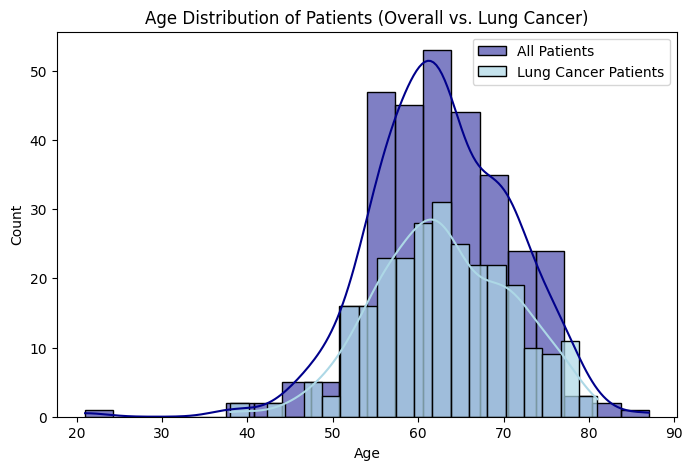

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["AGE"], bins=20, kde=True, color="darkblue", label="All Patients", alpha=0.5)
sns.histplot(df[df["LUNG_CANCER"] == 'YES']["AGE"], bins=20, kde=True, color="lightblue", label="Lung Cancer Patients", alpha=0.7)
plt.title("Age Distribution of Patients (Overall vs. Lung Cancer)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

plt.show()

In the figure above, the dark blue bars are showing the distribution of all patients in the dataset based on their age; the light blue bars are showing the distribution of patients with a positive lung cancer based on their age.

## Gender distribution

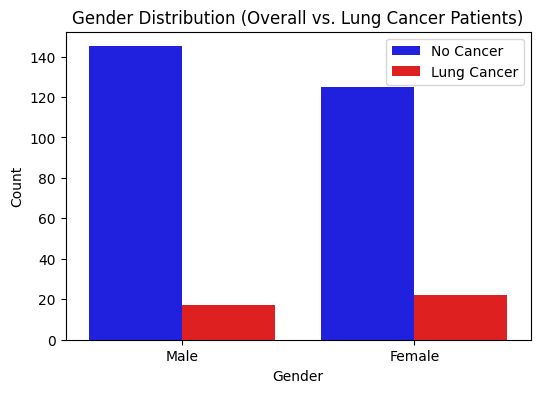

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["GENDER"].replace({"M": "Male", "F": "Female"}),  
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Gender Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

In the figure above, the blue bars are showing the distribution of all patients in the dataset based on their gender; the red bars are showing the distribution of patients with a positive lung cancer based on their gender.

## Distribution based on Alcohol consumption

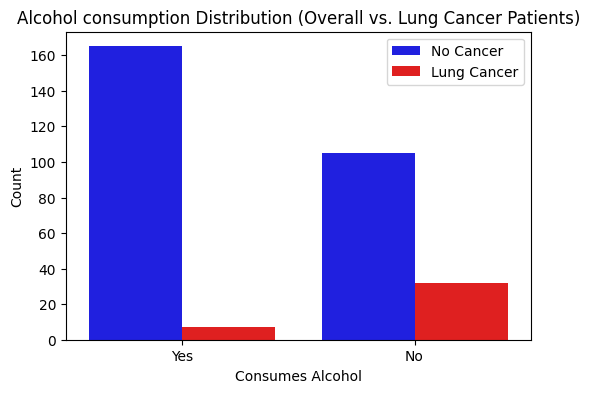

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["ALCOHOL CONSUMING"].replace({1: "No", 2: "Yes"}),
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Alcohol consumption Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Consumes Alcohol")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

In the figure above, the blue bars are showing the distribution of all patients in the dataset based on whether they consume alcohol or not and the red bars are showing the distribution of patients with a positive lung cancer based on whether they consume alcohol or not.

## Mutual Information Score

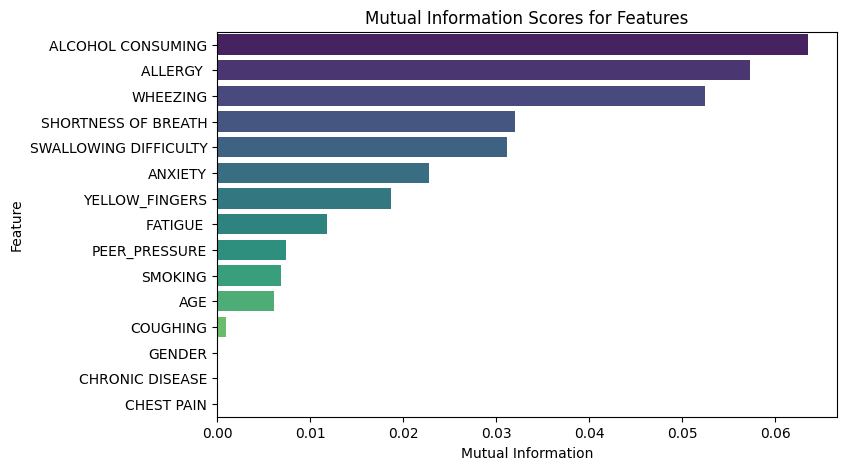

In [ ]:
X_mi = df.copy()
X_mi.loc[df['GENDER'] == 'F', 'GENDER'] = 0
X_mi.loc[df['GENDER'] == 'M', 'GENDER'] = 1
X_mi = X_mi.drop(columns=["LUNG_CANCER"])
y_mi = df["LUNG_CANCER"]
mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features="auto")
mi_df = pd.DataFrame({"Feature": X_mi.columns, "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df, hue="Feature", palette="viridis", legend=False)
plt.title("Mutual Information Scores for Features")
plt.show()

This plot shows how much each feature is effective on the outcome.

***
# Data Cleaning and Preparation

## Convert to boolean representatives
In the above Data Frame we convert `GENDER` to a boolean type indicating `0` as `Female` and `1` as `Male`
as well as `LUNG_CANCER` to a boolean type indicating `0` as `No` and `1` as `Yes`

In [ ]:
df.loc[df['LUNG_CANCER'] == 'YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER'] == 'NO', 'LUNG_CANCER'] = 0

df.loc[df['GENDER'] == 'F', 'GENDER'] = 0
df.loc[df['GENDER'] == 'M', 'GENDER'] = 1

columns_to_convert = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in columns_to_convert:
    df.loc[df[col] == 1, col] = 0
    df.loc[df[col] == 2, col] = 1

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Normalize
As all of the features except the `AGE` are boolean, we only need to Normalize the `AGE`

In [ ]:
scaler = MinMaxScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.803030,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.636364,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0.530303,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,0.742424,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,0.560606,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,0.696970,1,0,1,0,0,1,1,0,1,1,1,0,1,1


***
# Data Preprocessing

## Dividing dataset to X and Y
As the `LUNG_CANCER` is the column we need to predict it, we seperate it from the DataFrame into another variable. So `x` is our Features and `y` is our outputs.

In [ ]:
x = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [ ]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0.803030,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,0.636364,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0.530303,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,0.742424,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,0.560606,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,0.696970,1,0,1,0,0,1,1,0,1,1,1,0,1


In the table above, see all the features except the last one which is `LUNG_CANCER`

In [ ]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

And `y` contains only one feature which is `LUNG_CANCER`

## Convert to Numpy arrays
For machine learning purposes, we convert the `x` and `y` to numpy arrays.

In [ ]:
x = np.array(x)
y = np.array(y)
y = y.astype(int)

In [ ]:
x

array([[1, 0.7272727272727273, 0, ..., 1, 1, 1],
       [1, 0.8030303030303032, 1, ..., 1, 1, 1],
       [0, 0.5757575757575757, 0, ..., 1, 0, 1],
       ...,
       [1, 0.5606060606060606, 1, ..., 0, 0, 1],
       [1, 0.696969696969697, 1, ..., 1, 0, 1],
       [1, 0.6212121212121213, 0, ..., 0, 1, 0]],
      shape=(309, 15), dtype=object)

In [ ]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In this dataset, we don't necessarily need Normalization because most of our features are `boolean` features except for `AGE`, but for a better implementation we normalize the dataset.

## Split to Train/Test
We split our DataFrame to training and testing DataFrames by a 80 to 20 percent ratio.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

So `x_train` is our features for training, `x_test` is our features for testing, `y_train` is the training outputs and `y_test` is the test outputs.

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247,), (62,))

***
# Meachine Learning Algorithms
From now on, we will try different ML algorithms on the data to find out which one fits better and has a better accuracy.

## Naive Bayes
Naive Bayes is a simple algorithm that predicts things by calculating the chances of an event happening based on past data, assuming all features are independent.

### Train the Model



In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

### Performance

In [ ]:
y_pred_test_NB = nb.predict(x_test)

report_NB = classification_report(y_test, y_pred_test_NB)
print(report_NB)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.92      0.92      0.92        52

    accuracy                           0.87        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.87      0.87      0.87        62



### Visualize the model outcome

Confusion Matrix

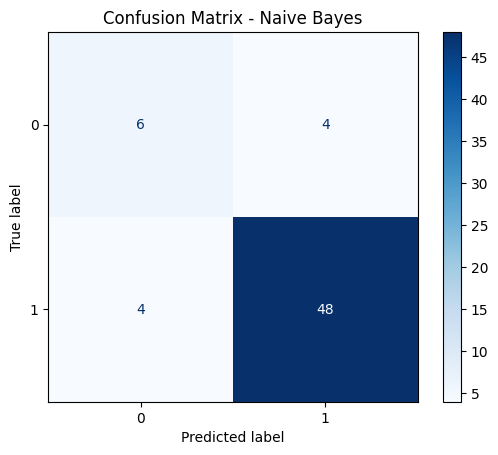

In [ ]:
# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_NB, cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

***
## KNN
K-Nearest Neighbors (KNN) is an algorithm that predicts a result by looking at the closest examples in the data and choosing the most common answer among them.

### Train the Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Performance

In [ ]:
y_pred_test_knn = knn.predict(x_test)

report_knn = classification_report(y_test, y_pred_test_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.98      0.88      0.93        52

    accuracy                           0.89        62
   macro avg       0.79      0.89      0.82        62
weighted avg       0.92      0.89      0.90        62



In [ ]:
confusion_matrix(y_test, y_pred_test_knn)

array([[ 9,  1],
       [ 6, 46]])

### Visualize the model outcome

Confusion Matrix

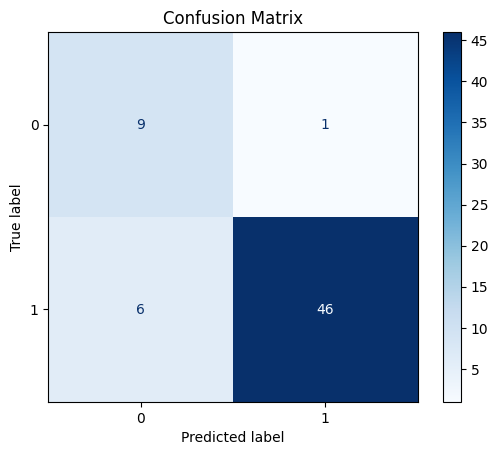

In [ ]:
# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
## Random Forest
Random Forest is an algorithm that makes predictions by combining the results of many decision trees, improving accuracy and reducing errors.
### Train the Model

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

### Performance

In [ ]:
y_pred_test_rf = rf.predict(x_test)

report_rf = classification_report(y_test, y_pred_test_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.94      0.92      0.93        52

    accuracy                           0.89        62
   macro avg       0.79      0.81      0.80        62
weighted avg       0.89      0.89      0.89        62



### Visualize the model outcome

Confusion Matrix

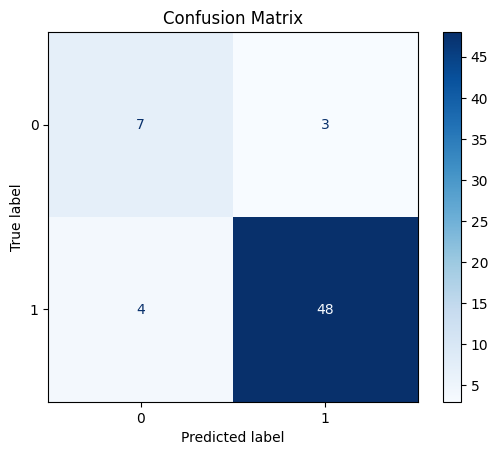

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
## Neural Network
A Neural Network (Multi-Layer Perceptron) is an algorithm that mimics how the human brain works, using layers of connected nodes (neurons) to learn patterns and make predictions.

### Train the Model

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)

### Performance

In [ ]:
y_pred_test_mlp = mlp_model.predict(x_test)

report_mlp = classification_report(y_test, y_pred_test_mlp)
print(report_mlp)

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.92      0.90      0.91        52

    accuracy                           0.85        62
   macro avg       0.73      0.75      0.74        62
weighted avg       0.86      0.85      0.86        62



### Visualize the model outcome

Confusion Matrix

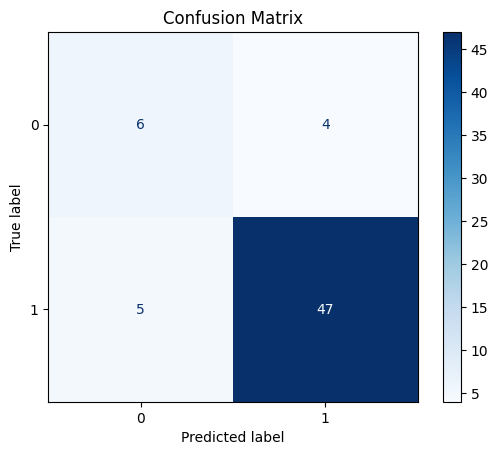

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_mlp, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
# Model Comparison

So, we applied four kinds of ML algorithms on our dataset. Let's see how accurate they have done than each other.

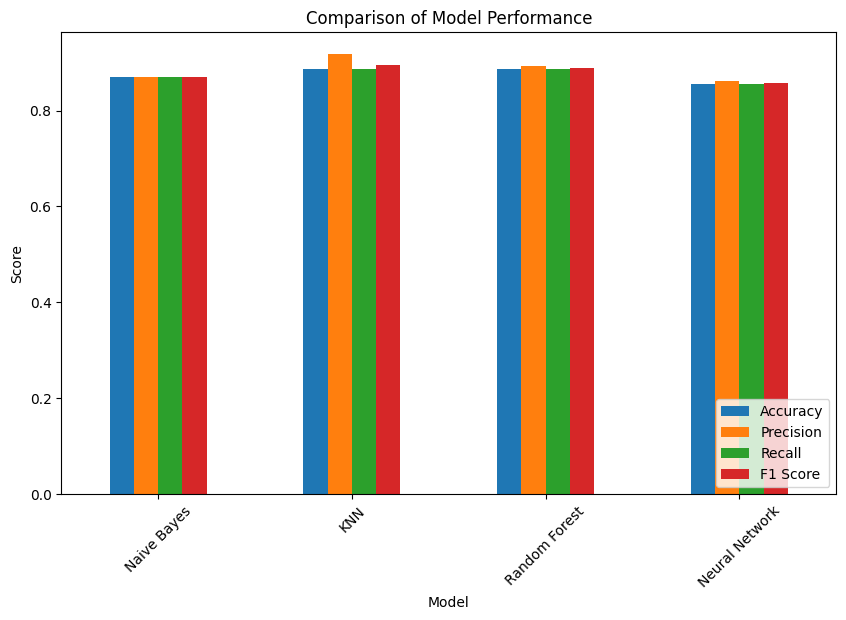

In [ ]:
report_dict_NB = classification_report(y_test, y_pred_test_NB, output_dict=True)
accuracy_NB = report_dict_NB['accuracy']
precision_NB = report_dict_NB['weighted avg']['precision']
recall_NB = report_dict_NB['weighted avg']['recall']
f1_NB = report_dict_NB['weighted avg']['f1-score']

report_dict_knn = classification_report(y_test, y_pred_test_knn, output_dict=True)
accuracy_knn = report_dict_knn['accuracy']
precision_knn = report_dict_knn['weighted avg']['precision']
recall_knn = report_dict_knn['weighted avg']['recall']
f1_knn = report_dict_knn['weighted avg']['f1-score']

report_dict_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)
accuracy_rf = report_dict_rf['accuracy']
precision_rf = report_dict_rf['weighted avg']['precision']
recall_rf = report_dict_rf['weighted avg']['recall']
f1_rf = report_dict_rf['weighted avg']['f1-score']

report_dict_mlp = classification_report(y_test, y_pred_test_mlp, output_dict=True)
accuracy_mlp = report_dict_mlp['accuracy']
precision_mlp = report_dict_mlp['weighted avg']['precision']
recall_mlp = report_dict_mlp['weighted avg']['recall']
f1_mlp = report_dict_mlp['weighted avg']['f1-score']

model_scores = {
    'Model': ['Naive Bayes', 'KNN', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_NB, accuracy_knn, accuracy_rf, accuracy_mlp],
    'Precision': [precision_NB, precision_knn, precision_rf, precision_mlp],
    'Recall': [recall_NB, recall_knn, recall_rf, recall_mlp],
    'F1 Score': [f1_NB, f1_knn, f1_rf, f1_mlp]
}

df_scores = pd.DataFrame(model_scores)
df_scores.set_index('Model', inplace=True)

df_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In the chart above, we can see that the KNN model performs slightly better than other models. However, they all are acting good and canbe used as a strong prediction models.

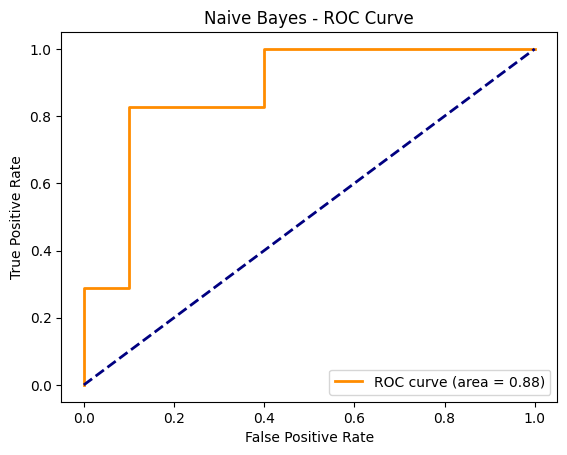

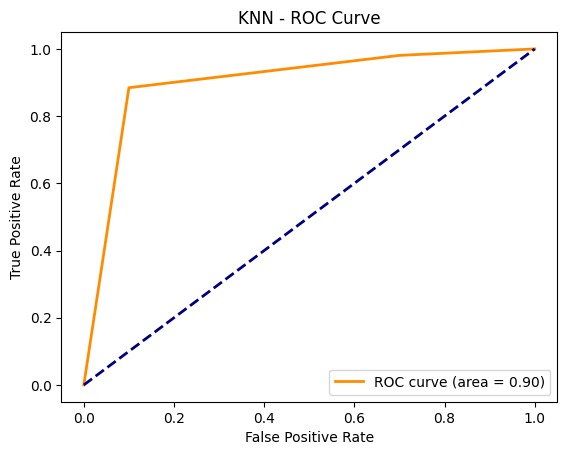

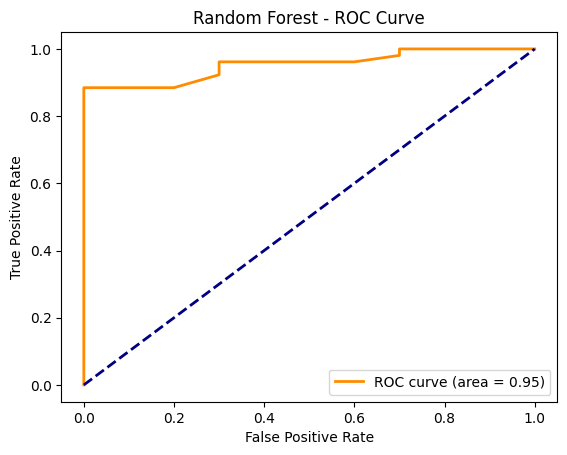

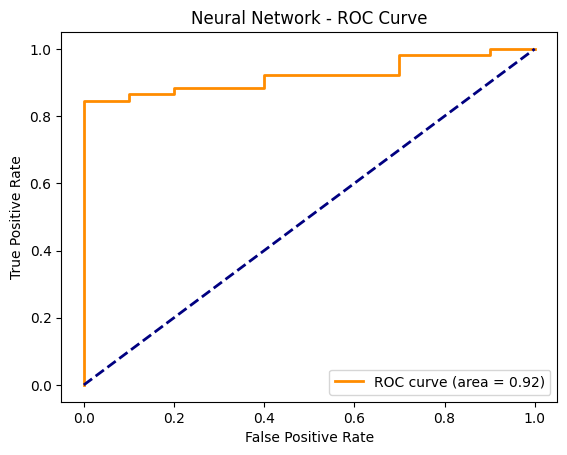

In [ ]:
y_pred_proba_NB = nb.predict_proba(x_test)[:, 1]
fpr_NB, tpr_NB, _ = roc_curve(y_test, y_pred_proba_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)

plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_NB:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_proba_knn = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_proba_mlp = mlp_model.predict_proba(x_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network - ROC Curve')
plt.legend(loc='lower right')
plt.show()

Let's have all of them in one plot

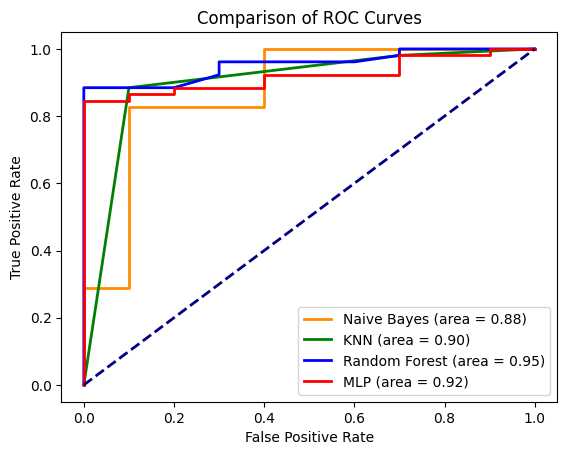

In [ ]:
plt.figure()

plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=2, label=f'Naive Bayes (area = {roc_auc_NB:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP (area = {roc_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc='lower right')
plt.show()